In [326]:
from matplotlib import pyplot as plt
import numpy as np
import pickle
import pandas as pd
import os
import json
import seaborn as sns
from itertools import chain
%matplotlib inline
%load_ext autoreload
%autoreload 2
from collections import Counter
from datetime import datetime, timedelta
import operator
import sys
from bisect import bisect_right, bisect, bisect_left
from scipy.stats import chisquare
sys.path.insert(0, '../')
from utilities.analysis_tools import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [327]:
merged_both_after_warmup = pickle.load(open('matched_tags_dataframe.pkl', 'rb'))
matched_tag_types = pd.read_csv('/home/yazdania/so_jobs_analysis/tags_to_categorise.csv', index_col=0)

In [328]:
so_tag_index = json.load(open('/dlabdata1/yazdania/trends_udemy/tag_to_index.json', 'r'))
so_week_index = pickle.load(open('/dlabdata1/yazdania/trends_udemy/tag_time_series_longer/week_index.pkl','rb'))
so_timeseries = pickle.load(open('/dlabdata1/yazdania/trends_udemy/tag_time_series_longer/tag_timeseries_matrix.pkl','rb'))


In [329]:
so_only_all = load_stack_overflow_trends(merged_both_after_warmup.TagName.values, 
                                               so_tag_index, so_week_index, so_timeseries,
                                                normalise = False)

In [330]:
adoption_sequences = calculate_all_adoption_sequences(merged_both_after_warmup, so_only_all)

In [331]:
all_tags = merged_both_after_warmup.TagName.values
tags_created_after_warmup = merged_both_after_warmup.loc[
            merged_both_after_warmup.TagFirstUseDate >= datetime(2016,10,1)].TagName.values
tags_from_one_year_before_warmup = merged_both_after_warmup.loc[
            merged_both_after_warmup.TagFirstUseDate >= datetime(2015,10,1)].TagName.values
tags_from_two_years_before_warmup = merged_both_after_warmup.loc[
            merged_both_after_warmup.TagFirstUseDate >= datetime(2014,10,1)].TagName.values
tags_half_a_year_after_warmup = merged_both_after_warmup.loc[
            merged_both_after_warmup.TagFirstUseDate >= datetime(2017,4,1)].TagName.values
tags_a_year_after_warmup = merged_both_after_warmup.loc[
            merged_both_after_warmup.TagFirstUseDate >= datetime(2017,10,1)].TagName.values
tags_popular = merged_both_after_warmup.loc[merged_both_after_warmup.TagCount > 
                                            merged_both_after_warmup.TagCount.median()].TagName.values


In [332]:
get_all_proportions(get_subset_of_tags(adoption_sequences, tags_created_after_warmup), 'short_adoption_seq')

(0.6106194690265486, 0.1504424778761062, 0.23893805309734514, 113)

In [333]:
get_all_proportions(get_subset_of_tags(adoption_sequences, tags_from_one_year_before_warmup), 'short_adoption_seq')

(0.7743589743589744, 0.08717948717948718, 0.13846153846153847, 195)

In [334]:
get_all_proportions(get_subset_of_tags(adoption_sequences, 
               list(set(tags_popular).intersection(set(tags_from_one_year_before_warmup)))), 'short_adoption_seq')

(0.9111111111111111, 0.011111111111111112, 0.07777777777777778, 90)

In [335]:
get_all_proportions(get_subset_of_tags(adoption_sequences, 
               list(set(tags_popular).intersection(set(tags_created_after_warmup)))), 'short_adoption_seq')

(0.8222222222222222, 0.022222222222222223, 0.15555555555555556, 45)

The two above, the intersection of popular tags with tags created after the warmup or from one year before the warmup, show an interesting relationship: the tags that are more popular later have a greater likelihood of having appeared first on Stack Overflow. This is interesting because although it could simply be a relatively trivial correlation (it appeared super quickly on Stack Overflow, so of course it was gonna be popular there! Also, the ones that are more popular were probably created earlier on and thus had more time to become popular), it could also be interpreted as: topics that eventually become more "important" (as evidenced by their final question count here) are more likely to appear first on Stack Overflow, further reinforcing the idea that Stack Overflow is the data source where we see earlier stages of innovation diffusion, and which should be used for predictions. This could be confirmed more strongly using another dataset to gauge the "importance", e.g. Google Trends, or by matching tags together based on their creation dates and other characteristics, e.g. type and topic, and treating SO-first vs non-SO-first as treatment vs control, seeing whether we still see the same popularity difference. This is difficult to do, however, because of the small number of tags that we have available (we could do it on a bigger set, such as the tags matched between courses and SO, or ads and SO, but the problem there is one of the availability of details since we've only manually tagged these 632 tags. However, the two following cells should be convincing enough that this isn't simply a matter of the tags having been created earlier, given the differences between the more popular tag set and the overall set in both cases (they're super small sets anyway, though).

In [336]:
(get_all_proportions(get_subset_of_tags(adoption_sequences, 
               list(set(tags_popular).intersection(set(tags_half_a_year_after_warmup)))), 'short_adoption_seq'),
 get_all_proportions(get_subset_of_tags(adoption_sequences, 
               tags_half_a_year_after_warmup), 'short_adoption_seq'))

((0.6818181818181818, 0.045454545454545456, 0.2727272727272727, 22),
 (0.4305555555555556, 0.2361111111111111, 0.3333333333333333, 72))

In [337]:
(get_all_proportions(get_subset_of_tags(adoption_sequences, 
               list(set(tags_popular).intersection(set(tags_a_year_after_warmup)))), 'short_adoption_seq'),
 get_all_proportions(get_subset_of_tags(adoption_sequences, 
               tags_a_year_after_warmup), 'short_adoption_seq'))

((0.6, 0.1, 0.3, 10),
 (0.2978723404255319, 0.3191489361702128, 0.3829787234042553, 47))

In [338]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.max_colwidth', -1):
    display(matched_tag_types.groupby('TagType').count())

,TagName,IsVersion,IsMajorVersion,LangOrPlatform,HasAPIOrSupports,Excerpt
TagType,,,,,,
admin-concept,1,1,1,0,0,1
admin-framework-core-feature,1,1,1,1,0,1
admin-solution-build-sdk,1,1,1,1,0,1
admin-solution-core-feature,1,1,1,1,0,1
admin-tool,11,11,11,5,0,11
analytics-framework-api,1,1,1,1,0,1
analytics-framework-data-concept,1,1,1,1,0,1
analytics-solution-graph-library,1,1,1,1,0,1
analytics-solution-server-solution,1,1,1,1,0,1


In [358]:
# Big TODO here.
topic_synonyms_dict = {'db': 'database',
                 'll':'lowlevel',
                 'generalpurpose': 'gp',
                 'core': 'gp'}

lang_synonyms_dict = {}

In [340]:
tag_topics_and_types = pd.merge(matched_tag_types, matched_tag_types.apply(lambda x: 
                       pd.Series(get_umbrella_topic(x['TagType'])), axis=1).\
                       rename(columns={0:'topic',1:'type'}), left_index=True, right_index=True)
tag_topics_and_types['AllLangs'] = tag_topics_and_types.\
                            apply(lambda x: x['LangOrPlatform'].strip('"')+','+x['HasAPIOrSupports'].strip('"') 
                            if not pd.isna(x['LangOrPlatform']) and not pd.isna(x['HasAPIOrSupports'])
                            else 
                            x['LangOrPlatform'] 
                            if not pd.isna(x['LangOrPlatform']) and pd.isna(x['HasAPIOrSupports'])
                            else 
                            x['HasAPIOrSupports'] 
                            if pd.isna(x['LangOrPlatform']) and not pd.isna(x['HasAPIOrSupports'])
                            else np.NaN, axis=1)
tag_topics_and_types.head()

,TagName,IsVersion,IsMajorVersion,TagType,LangOrPlatform,HasAPIOrSupports,Excerpt,topic,type,AllLangs
0,vuejs2,True,True,lang-web-framework,vue.js,NaN,Use this tag for questions specific to version...,web,framework,vue.js
1,google-cloud-firestore,False,False,cloud-database,google-cloud,"c++,node.js,javascript,android,swift,objective...",Cloud Firestore is an auto-scaling real-time d...,cloud,database,"google-cloud,c++,node.js,javascript,android,sw..."
2,json.net,False,False,lang-web-framework,.net,NaN,Json.NET (also known as Newtonsoft.Json) is a ...,web,framework,.net
3,ionic3,True,True,lang-mobile-sdk,javascript,NaN,"Ionic 3 is the newer version of Ionic, an open...",mobile,sdk,javascript
4,mongodb-query,False,False,database-core-feature,mongodb,NaN,This tag is for questions related to querying ...,database,feature,mongodb


In [341]:
merged_both_after_warmup.head()

,TagName,author,ad_date,course_date,TagCount,Excerpt,TagWikiDate,TagFirstUseDate,TagNthUseDate,nth_ad_date,nth_course_date,difference_in_days,difference_from_tag_first_use,difference_from_tag_wiki,ExcerptVec,AdFirst
0,vuejs2,ABOUT YOU GmbH,2016-12-02 17:51:14,2017-02-23 19:47:36,15043,Use this tag for questions specific to version...,2016-10-10 13:24:27,2016-02-27 01:15:56.420,2016-09-07 22:58:01.873,2017-09-01 20:38:12,2017-09-06 09:25:07,83,279,53,"[-0.04369566704346133, 0.02590556795309697, -0...",True
1,google-cloud-firestore,AURO NEW TRANSPORT CONCEPT SL.,2017-12-18 14:40:48,2017-07-03 12:21:18,11223,Cloud Firestore is an auto-scaling real-time d...,2017-10-03 16:20:05,2017-07-05 16:23:41.513,2017-10-03 20:46:37.610,2018-02-07 18:37:35,2018-03-28 06:12:35,-169,-3,-93,"[-0.09344200964551419, -0.01607348897960037, 0...",False
2,json.net,"BridgePay Network Solutions, LLC",2018-04-27 06:00:50,2017-09-19 10:56:37,10294,Json.NET (also known as Newtonsoft.Json) is a ...,2011-02-05 12:22:34,2008-09-20 00:44:26.330,2009-01-28 22:35:16.750,NaT,2018-11-11 13:25:40,-220,3286,2417,"[-0.1431919313967228, -0.022353296540677546, -...",False
3,ionic3,Alpha Telefonica,2017-09-01 02:02:18,2016-11-19 21:36:34,10284,"Ionic 3 is the newer version of Ionic, an open...",2017-04-14 04:59:11,2016-01-13 07:09:26.983,2016-06-06 11:40:24.703,2018-03-14 13:42:57,2017-05-06 20:50:11,-286,311,-146,"[-0.07675749761983752, 0.04825124121271074, -0...",False
4,mongodb-query,NextVR,2017-10-06 14:22:34,2017-07-13 08:36:31,10000,This tag is for questions related to querying ...,2012-05-06 06:11:17,2010-02-19 19:07:14.197,2010-07-08 22:41:20.070,2018-04-17 09:32:24,2018-06-18 10:30:47,-86,2700,1894,"[-0.12596115039195865, 0.012548449914902449, -...",False


In [346]:
def create_s_first_proportion_barcharts(adoption_seq_df, tag_types_df, types_to_handle, 
                                        column_to_use='topic', type_equivalence_dict=None, min_freq=None):
    results = list()
    if type_equivalence_dict is not None:
        types_to_handle = [type_equivalence_dict.get(x, x) for x in types_to_handle]
        adoption_seq_df = adoption_seq_df.copy()
        tag_types_df[column_to_use] = tag_types_df[column_to_use].\
                    apply(lambda x: type_equivalence_dict.get(x, x))
    for tag_type in types_to_handle:
        tag_names = tag_types_df.loc[tag_types_df[column_to_use].apply(lambda x: tag_type in x.strip('"').split(',') 
                                                                       if not pd.isna(x) else False)].\
                                    TagName.values
        results.append(get_all_proportions(get_subset_of_tags(adoption_seq_df, tag_names), 
                                           'short_adoption_seq'))
    fig = plt.figure(figsize=(20,20))
    ax = [fig.add_subplot(211), fig.add_subplot(212)]
    results_sorted = [(types_to_handle[i], results[i][0], results[i][3]) for i in range(len(results))]
    if min_freq is not None:
        results_sorted = [x for x in results_sorted if x[2] >= min_freq]
    results_sorted = sorted(results_sorted, key=lambda x: x[2])
    results_sorted = results_sorted[::-1]
    ax[0].bar(x=[x[0] for x in results_sorted], height=[x[1] for x in results_sorted], color='blue')
    ax[0].set_yticks(np.arange(0,1.1,0.1))

    ax[1].bar(x=[x[0] for x in results_sorted], height=[x[2] for x in results_sorted], color='blue')
    ax[1].set_yticks(np.arange(0,max([x[3] for x in results])+5,5))
    for axis in ax:
        axis.tick_params(axis='x', rotation=75)
        axis.tick_params(axis='both', which='major', labelsize=15)
    ax[1].set_xlabel('Type of tag', fontsize=15)
    ax[0].set_ylabel('Proportion of StackOverflow-first\n tags within topic', fontsize=15)
    ax[1].set_ylabel('Total number of tags within topic', fontsize=15)
    plt.subplots_adjust(hspace=0.35)
    plt.show()

## Topics (web, cloud, etc.)

/home/yazdania/.conda/envs/py36_conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


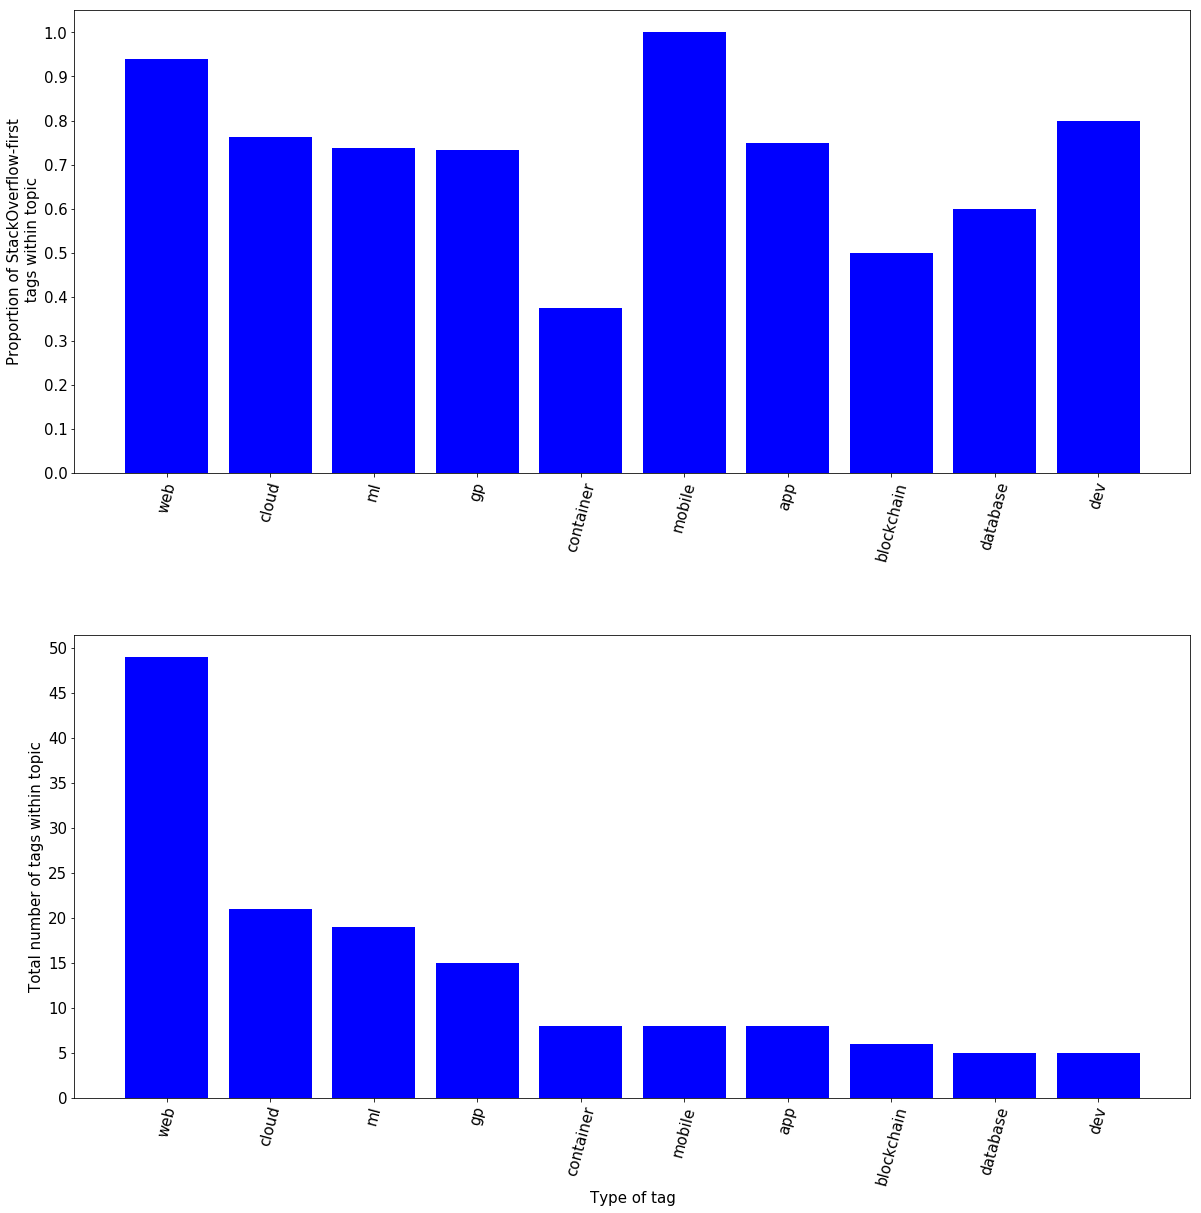

In [360]:
tag_subset = tags_from_one_year_before_warmup
top_n_topics = pd.DataFrame(get_subset_of_tags(tag_topics_and_types, tag_subset)['topic'].\
                            value_counts()).reset_index().\
            rename(columns={'index':'topic', 'topic': 'count'}).head(30).topic.values
create_s_first_proportion_barcharts(adoption_sequences, 
                get_subset_of_tags(tag_topics_and_types, tag_subset), top_n_topics, 
                                    type_equivalence_dict=topic_synonyms_dict, min_freq=5)

What does this tell us? That generally, more programming-heavy tags have a much higher tendency to appear first on Stack Overflow, and tags that don't necessarily involve developing applications have a lower tendency, although many types still end up appearing first on Stack Overflow (but not as overwhelmingly as, say, web or mobile topics). In particular, it's notable that topics leaning more towards administration (e.g. database, container, especially the latter) have lower than 50% ratios; this might be because there are other StackExchange websites for _non-programmatic_ questions, which would be a very interesting result; indeed, if we can prove that StackExchange as a whole is really fast in pretty much everything, then we will have taken one step further towards a predictive model. Our statement is a bit of an overgeneralisation though, given the numbers when considering tags from a year before the warmup period (Oct. 2015); here we can only be confident about web, with cloud and ml also being kinda reliable. 

If we look at two years before the warmup (approximately where we've put the end of Udemy's warmup period), we see that most topics that are programming-heavy are at least at the general Udemy-StackOverflow level (70% SO-first). Also, looking at all the tags, we can see that container and blockchain are the two things that are always very close to 50% or below it (and way below 70%, our usual SO-first percentage), meaning that these topics seem to get attention more quickly in ads/courses (particularly in courses). Also, there are relatively few of them, which is in line with their lower importance on a developer Q&A website.

## Types (library, solution, etc.)

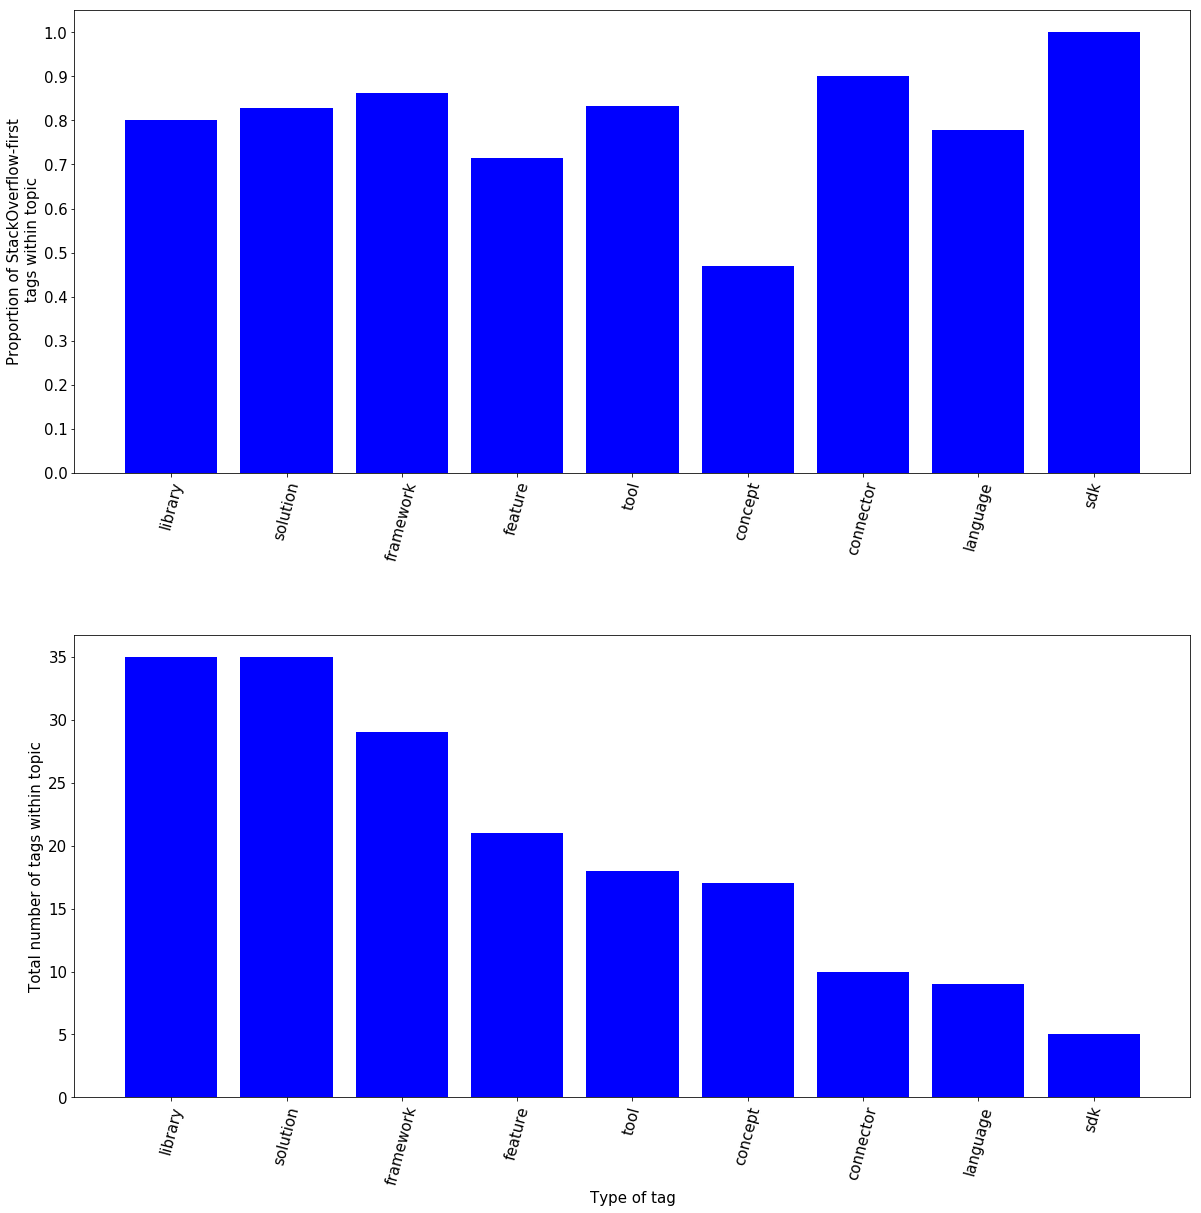

In [348]:
tag_subset = tags_from_one_year_before_warmup
top_n_topics = pd.DataFrame(get_subset_of_tags(tag_topics_and_types, tag_subset)['type'].\
                            value_counts()).reset_index().\
            rename(columns={'index':'type', 'type': 'count'}).head(30)['type'].values
create_s_first_proportion_barcharts(adoption_sequences, 
                get_subset_of_tags(tag_topics_and_types, tag_subset), top_n_topics, 'type', min_freq=5)

This is great. What we can see clearly here is that _concepts_ are considerably less likely to appear first on Stack Overflow, given the fact that Stack Overflow focuses on programming questions, and thus favours concrete topics as tags rather than more general concepts. This is, however, less visible in the full set of tags, because the concepts make up the bulk of the full set of tags. This might also reflect a policy change by Stack Overflow. Either way, given the bias of the full set towards SO-first, we could only confirm a type's _lack of conformity to the SO-first hypothesis_ using that, and we cannot say it conforms to the hypothesis except using the more recent data.

Something that's very interesting is that we see no really substantial decrease in the SO-first proportion for "features". These are some of the tags that we expect will get fewer courses/ads in general (especially ads) because they're so specific. So our expectation is largely met (there's a small decrease but it's not significant).

## Languages/Platforms

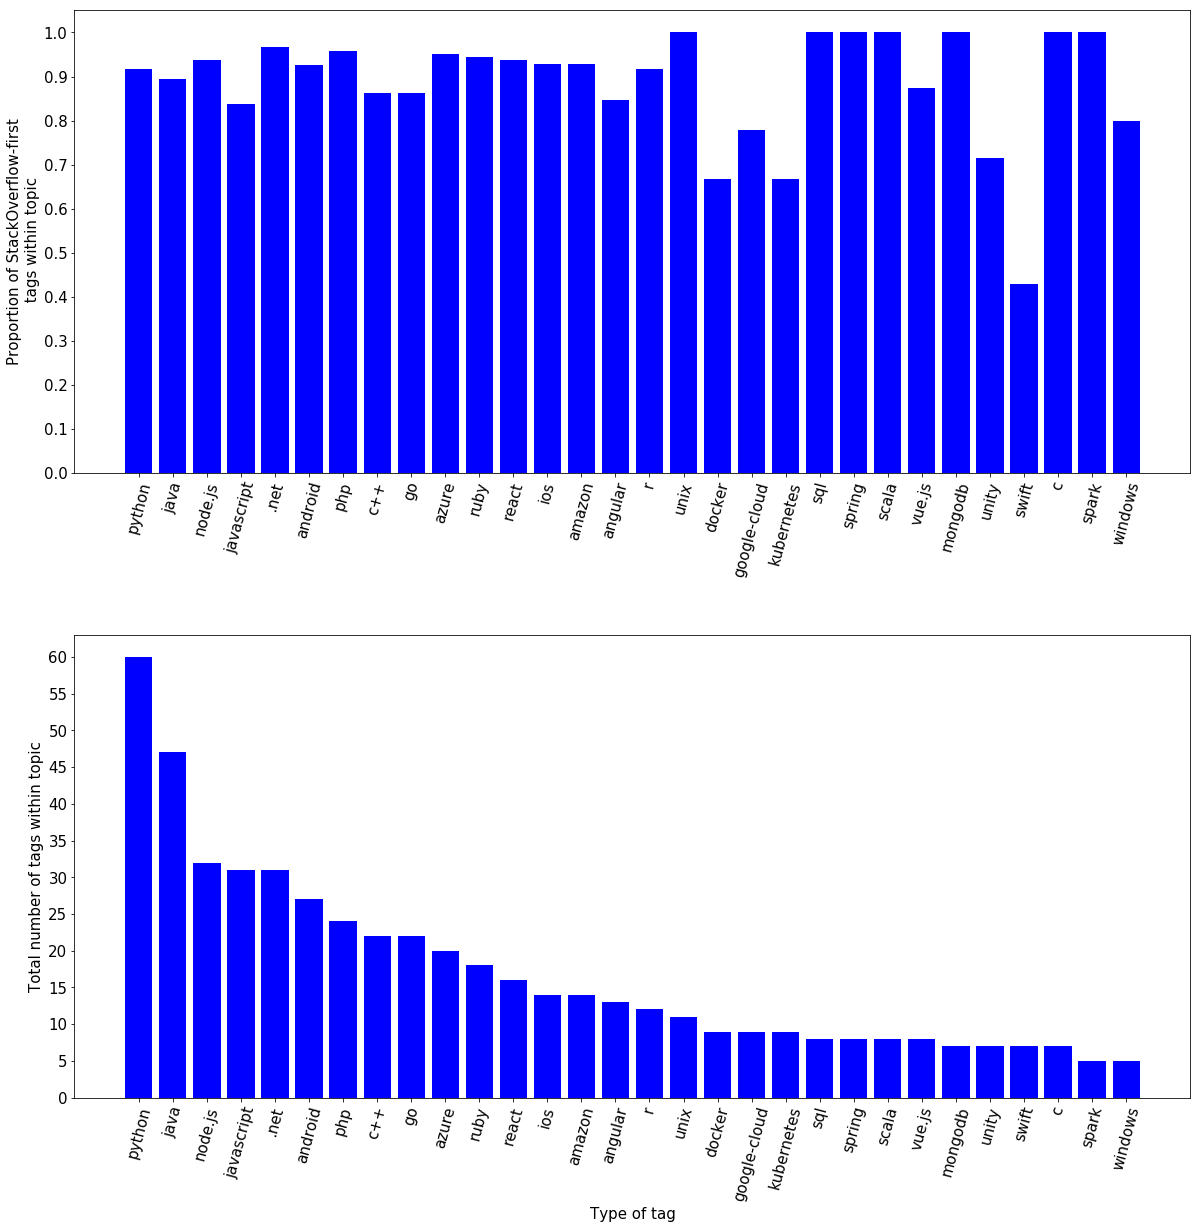

In [356]:
tag_subset = all_tags
current_col = 'AllLangs'
top_n_topics = pd.DataFrame(get_subset_of_tags(tag_topics_and_types, tag_subset))[current_col].dropna().\
                            apply(lambda x: x.split(',')).apply(pd.Series).unstack().reset_index(drop=True).\
                            value_counts().reset_index().\
            rename(columns={'index': current_col, current_col: 'count'}).head(30)[current_col].values
create_s_first_proportion_barcharts(adoption_sequences, 
                get_subset_of_tags(tag_topics_and_types, tag_subset), top_n_topics, current_col, min_freq=5)

When it comes to languages, stuff's kinda messy. For some reason Java appears to have a lower SO-first proportion when we look at the more recent tags, but generally, most programming languages and popular frameworks are at a similar level. Docker and Kubernetes have much lower proportions as we would expect from the analysis of topics done earlier.

### Summing up

These serve as evidence that when a tag is truly relevant to Stack Overflow conceptually and is eventually going to become important (i.e. it pertains to more programmatic concepts and is more concrete rather than conceptual), it tends to come first on Stack Overflow, which is our grassroots data source. This reinforces our hypothesis that generally, Stack Overflow comes earlier in the adoption/diffusion process, but also raises an important point: Stack Overflow comes earlier but only for topics that are truly relevant to it, so looking at the correct place is of utmost importance in the early detection of innovations and their dependents. Bear in mind that we still have not addressed the final question of whether or not prediction is possible; that question requires us to dig further into the data and to see if, at least for the most systematically SO-first tags (based on their topic and type), we can see similar patterns that we do not observe in the non-SO-first tags.

### TODO: Other groupings of tags, and mapping similar topics/types to the same word.

In [198]:
tag_topics_and_types['topic'].value_counts().to_dict()

{'web': 98,
 'cloud': 47,
 'core': 38,
 'ml': 33,
 'code': 29,
 'app': 24,
 'math': 21,
 'mobile': 21,
 'generalpurpose': 20,
 'ui': 17,
 'design': 17,
 'admin': 16,
 'security': 15,
 'database': 15,
 'build': 14,
 'analytics': 12,
 'data': 12,
 'container': 12,
 'connector': 11,
 'os': 11,
 'gfx': 8,
 'server': 8,
 'file': 7,
 'hardware': 7,
 'test': 7,
 'blockchain': 6,
 'll': 6,
 'dev': 6,
 'standard': 6,
 'map': 6,
 'deployment': 5,
 'ide': 5,
 'network': 5,
 'versioning': 5,
 'cv': 5,
 'management': 5,
 'microserv': 4,
 'db': 4,
 'vr': 4,
 'commerce': 3,
 'wiki': 2,
 'cs': 2,
 'graph': 2,
 'audio': 2,
 'compute': 2,
 'collab': 2,
 'macro': 2,
 'scripting': 2,
 'format': 2,
 'business': 2,
 'query': 1,
 'website': 1,
 'template': 1,
 'messaging': 1,
 'edu': 1,
 'survey': 1,
 'platform': 1,
 'meta': 1,
 'game': 1,
 'vm': 1,
 'mvc': 1}

In [66]:
tag_topics_and_types['type'].value_counts().to_dict()

{'concept': 155,
 'library': 90,
 'solution': 82,
 'feature': 71,
 'framework': 55,
 'tool': 48,
 'language': 31,
 'connector': 18,
 'api': 15,
 'format': 11,
 'sdk': 8,
 'client': 5,
 'proxy': 3,
 'database': 3,
 'platform': 3,
 'service': 2,
 'ui': 1}

In [77]:
pd.concat([tag_topics_and_types['LangOrPlatform'].dropna().apply(lambda x: x.split(',')).apply(pd.Series).\
          unstack().reset_index(drop=True), 
          tag_topics_and_types['HasAPIOrSupports'].dropna().apply(lambda x: x.split(',')).apply(pd.Series).\
          unstack().reset_index(drop=True)]).dropna().value_counts().to_dict()


{'python': 60,
 'java': 47,
 '.net': 32,
 'node.js': 32,
 'javascript': 31,
 'android': 27,
 'php': 24,
 'c++': 22,
 'go': 22,
 'azure': 20,
 'ruby': 18,
 'react': 16,
 'ios': 14,
 'amazon': 14,
 'angular': 13,
 'r': 12,
 'unix': 11,
 'kubernetes': 9,
 'docker': 9,
 'google-cloud': 9,
 'scala': 8,
 'vue.js': 8,
 'sql': 8,
 'spring': 8,
 'swift': 7,
 'c': 7,
 'unity': 7,
 'mongodb': 7,
 'windows': 5,
 'spark': 5,
 'powershell': 4,
 'c#': 4,
 'html': 4,
 'google': 4,
 'css': 4,
 'typescript': 3,
 'kotlin': 3,
 'jenkins': 3,
 'ecmascript': 3,
 'microsoft': 3,
 'django': 3,
 'objective-c': 3,
 'unreal-engine': 2,
 'julia': 2,
 'sling': 2,
 'laravel': 2,
 'asp.net': 2,
 'redux': 2,
 'chef': 2,
 'ruby-on-rails': 2,
 'maven': 2,
 'rust': 2,
 'facebook': 2,
 'jquery': 2,
 'wordpress': 2,
 'graphql': 2,
 'tinkerpop': 1,
 'racket': 1,
 'ajax': 1,
 'office': 1,
 'zos': 1,
 'pig': 1,
 'hibernate': 1,
 'drupal': 1,
 'mesos': 1,
 'ansible': 1,
 'ddl': 1,
 'testng': 1,
 'hive': 1,
 'abap': 1,
 'kafka

In [69]:
matched_tag_types.loc[matched_tag_types.LangOrPlatform.isna() & 
                      matched_tag_types.TagType.apply(lambda x: '-concept' not in x)]

,TagName,IsVersion,IsMajorVersion,TagType,LangOrPlatform,HasAPIOrSupports,Excerpt
37,antlr,False,False,code-framework,NaN,NaN,"ANTLR, ANother Tool for Language Recognition, ..."
56,nsis,False,False,build-solution,NaN,NaN,This tag is used for questions about the open ...
59,keycloak,False,False,security-framework,NaN,NaN,Integrated Single Sign On (SSO) and Identity M...
70,barcode-scanner,False,False,hardware,NaN,NaN,A barcode reader (or barcode scanner) is an el...
71,iis-express,False,False,server-solution,NaN,NaN,IIS Express is the developer version of full I...
88,elf,False,False,file-format,NaN,NaN,"ELF stands for Executable and Linkable Format,..."
95,lex,False,False,code-solution,NaN,NaN,Lex is a computer program that generates lexic...
101,ini,False,False,file-format,NaN,NaN,The INI file format includes text-based initia...
115,shapefile,False,False,map-format,NaN,NaN,The Esri shapefile or simply a shapefile is a ...
119,netcdf,False,False,standard,NaN,NaN,NetCDF (Network Common Data Form) is a set of ...


Notes:
* The `data` category ranges from data structures to signals and communications.
* The `ll` category is for low-level concepts, such as opcodes.
* The `os` category is more directly related to operating systems since `ll` is now separate.
* The `admin` category is relatively broad: ranging from small cmd programs (like htop) to entire admin solutions.

In [ ]:
# # This part was used to map tag types that were entirely wrong to their new types.
# mapping = {x:x for x in matched_tag_types.TagType.unique()}
# mapping.update({'build-soluton': 'build-solution',
#                 'collaborative-solution': 'collab-solution',
#                 'computation-framework': 'compute-framework',
#                 'crypto-concept': 'security-concept',
#                 'development-solution': 'dev-solution',
#                 'dev-stack': 'dev-solution',
#                 'doc': 'collab-solution',
#                 'gui': 'ui',
#                 'help-solution': 'management-solution',
#                 'language-implementation': 'library',
#                 'lbrary': 'library',
#                 'libray': 'library',
#                 'platform-feature': 'solution-feature',
#                 'project-solution': 'dev-solution',
#                 'protocol': 'standard',
#                 'source-control': 'versioning-solution',
#                 'web-server': 'server-solution'})

In [44]:
#matched_tag_types.loc[matched_tag_types.TagType.apply(lambda x: 'web-solution' in x)]

In [24]:
# matched_tag_types['TagType'] = matched_tag_types['TagType'].apply(lambda x: mapping[x])

In [26]:
# matched_tag_types.to_csv('/home/yazdania/so_jobs_analysis/tags_to_categorise.csv')

In [45]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.max_colwidth', -1):
#     display(pd.merge(matched_tag_types, merged_both_after_warmup[['TagName', 'Excerpt']], on='TagName'))

In [46]:
# individual_tag_mapping = {matched_tag_types.TagName.values[i]: matched_tag_types.TagType.values[i] 
#                           for i in range(matched_tag_types.shape[0])}
# individual_tag_mapping.update({'google-cloud-firestore': 'cloud-database', 'google-cloud-functions': 'cloud-compute-solution', 'pyqt5': 'ui-api', 
#                                'wxpython': 'ui-connector', 'retrtofit2': 'web-client', 'azure-functions': 'cloud-compute-solution', 'javamail': 'web-api', 
#                                'wmi': 'os-api', 'azure-cosmosdb': 'cloud-database', 'antlr': 'compiler-framework', 'aws-api-gateway': 'cloud-api-solution', 
#                                'vuex': 'framework-library', 'amazon-cognito': 'cloud-data-solution', 'asp.net-core-webapi': 'web-api', 'angular-material2': 'framework-library', 
#                                'azure-service-fabric': 'cloud-dev-solution', 'angular2-forms': 'framework-concept', 'azure-pipelines': 'cloud-build-solution', 'vuetify.js': 'framework-framework', 
#                                'ngrx': 'framework-library', 'nsis': 'build-solution', 'angular2-services': 'framework-concept', 'setuptools': 'build-library', 'roslyn': 'compiler-api', 'nuxt.js': 'framework-framework', 
#                                'gcloud': 'admin-tool', 'emgucv': 'gfx-connector', 'dask': 'analytics-library', 'resttemplate': 'framework-feature', 'azure-application-insights': 'cloud-analytics-solution', 'caliburn.micro': 'mvc-framework', 
#                                'react-hooks': 'framework-feature', 'amazon-sns': 'cloud-notif-service', 'spring-webflux': 'framework-feature', 'gatsby': 'framework-library', 'statsmodels': 'analytics-library', 
#                                'image-segmentation': 'gfx-concept', 'glfw': 'gfx-library', 'firebase-analytics': 'cloud-analytics-solution', 'tensorboard': 'framework-library', 'next.js': 'framework-framework', 'redux-saga': 'framework-connector', 
#                                'spacy': 'ml-library', 'code-formatting': 'design-concept', 'xgboost': 'ml-library', 'jacoco': 'test-tool', 'owl-carousel': 'framework-library', 'react-apollo': 'framework-ui-library', 'shapefile': 'map-format', 
#                                'azure-powershell': 'cloud-admin-solution', 'kubectl': 'container-cmd-tool', 'apache-zeppelin': 'analytics-tool', 'azure-data-lake': 'cloud-analytics-solution', 'razor-pages': 'framework-feature', 'androidx': 'mobile-library', 
#                                'android-camera2': 'mobile-library', 'unit-of-work': 'design-concept', 'keytool': 'security-tool', 'azure-iot-hub': 'cloud-connector-solution', 'apollo-client': 'ui-library', 'traefik': 'web-proxy', 'scikit-image': 'cv-library', 
#                                'arcore':'ar-framework', 'amazon-athena': 'cloud-database-tool', 'rbenv': 'versioning-library', 'force-layout': 'ui-concept', 'gradle-plugin': 'solution-concept', 'minikube': 'container-vm-tool', 'glew': 'gfx-library', 'ionic-native': 'mobile-sdk', 
#                                'informatica-powercenter': 'data-connector-solution', 'cpython': 'lang-implementation', 'azure-api-management': 'cloud-api-solution', 'react-native-navigation': 'framework-library', 'autosuggest': 'ui-concept', 'android-keystore': 'mobile-api', 
#                                'virtuemart': 'commerce-solution', 'android-jetpack': 'mobile-sdk', 'sparkr': 'analytics-library', 'spring-cloud-config': 'server-solution', 'istio': 'microserv-solution', 'arm-template': 'cloud-solution-feature', 'vue-cli': 'admin-tool', 
#                                'ambari': 'analytics-server-solution', 'actioncable': 'framework-library', 'aws-iot': 'cloud-connector-solution', 'ngrx-store': 'framework-library', 'azure-virtual-network': 'web-proxy', 'web3': 'blockchain-framework', 'ngx-bootstrap': 'framework-connector', 
#                                'mgo': 'database-connector', 'image-compression': 'cv-concept', 'semantic-ui-react': 'framework-ui-library', 'firedac': 'connector-library', 'topojson': 'map-format', 'sinch': 'mobile-sdk', 'ngrx-effects': 'framework-library', 'node-sass': 'framework-connector', 
#                                'hibernate-annotations': 'library-concept', 'angular-template': 'framework-concept', 'react-native-firebase': 'framework-library', 'kotlin-android-extensions': 'mobile-library', 'cntk': 'ml-library', 'powerapps': 'dev-solution', 
#                                'tpl-dataflow': 'framework-library', 'react-router-redux': 'framework-library', 'web3js': 'blockchain-library', 'truffle':'blockchain-dev-solution', 'oidc': 'security-connector', 'aws-codebuild': 'cloud-dev-solution', 
#                                'yolo': 'cv-library', 'azure-cognitive-services': 'cloud-ml-solution', 'uicontrol': 'mobile-framework-feature', 'mockmvc': 'mvc-framework-feature', 'amazon-lex': 'cloud-ml-solution', 'undertow': 'web-server-solution', 'windows-firewall': 'security-solution', 
#                                'vmware-workstation': 'vm-solution', 'workbox': 'server-build-solution', 'replicaset': 'database-feature', 'laravel-dusk':'framework-test-api', 'azure-kubernetes': 'cloud-container-solution', 'azure-api-apps': 'cloud-api-solution', 'rpa': 'ml-concept', 
#                                'changeset': 'versioning-concept', 'azure-container-service': 'cloud-container-solution', 'pwm': 'hardware-concept', 'rssi': 'comms-concept', 'react-context': 'framework-feature', 'holoviews': 'analytics-library', 'aot': 'management-platform-feature', 
#                                'arcmap': 'map-tool', 'read-the-docs': 'wiki', 'prisma': 'database-connector', 'snort': 'network-security-tool', 'runtime-permissions': 'mobile-feature', 'fabric8': 'microserv-solution', 'qt3d': 'gfx-library', 'elastica': 'analytics-library', 'saga': 'design-concept', 
#                                'background-subtraction': 'cv-concept', 'element-ui': 'framework-library', 'ack': 'compile-tool', 'bloc': 'design-concept', 'go-ethereum': 'blockchain-library', 'quantization': 'math-concept', 'swift-package-manager': 'build-solution', 'design-by-contract':'design-concept', 
#                                'vbox': 'library-feature', 'geth': 'blockchain-library', 'seq2seq': 'ml-library', 'recompose': 'framework-library', 'monorepo': 'versioning-concept', 'color-mapping': 'ui-concept', 'elasticsearch-query': 'framework-concept', 'polly': 'framework-library', 
#                                'visual-recognition': 'cv-solution', 'row-level-security': 'database-security-concept', 'free-monad': 'design-concept', 'vue-material': 'framework-framework', 'google-slides': 'cloud-collab-solution', 'volusion': 'web-commerce-solution', 'bounded-contexts': 'design-concept', 
#                                'graphframes': 'analytics-library', 'metamask':'web-connector', 'dl4j': 'ml-library', 'natural-join': 'database-concept', 'amazon-quicksight': 'cloud-analytics-solution', 'specification-pattern': 'design-concept', 'statechart': 'design-concept', 'pprof':'server-library', 'sku': 'business-concept', 
#                                'deform': 'web-library', 'mapping-model': 'design-concept', 'reportng': 'framework-tool', 'srv':'tech-concept', 'blue-green-deployment': 'deployment-concept', 'symfony-flex': 'admin-tool', 'sld': 'map-format', 'adaptive-ui': 'mobile-ui', 'flowable':'business-library', 'seneca':'microserv-library', 
#                                'private-subnet':'network-concept', 'highrise': 'management-solution', 'cucm': 'business-tool', 'image-viewer': 'gfx-tool', 'hapi.js': 'framework-server-framework', 'rook': 'web-library', 'radium': 'framework-library', 'canary-deployment': 'deployment-concept', 'pbr': 'gfx-concept', 
#                                'jquery-ui-plugins': 'framework-ui-concept', 'contract-first': 'design-concept', 'ispf': 'admin-tool', 'react-fiber': 'framework-library', 'no-framework': 'design-concept', '.net-core-1.1': 'web-framework', 'data-access-object': 'design-concept', 'pallet': 'deployment-solution', 'automatic-failover': 'database-concept', 
#                                'slab': 'framework-feature', 'manifold': 'map-tool', 'account-linking':'database-concept', 'floating-ip': 'network-concept', 'geopackage': 'map-format', 'map-basic': 'map-language', 'connection-points': 'connector-concept', 'staging-table': 'data-concept', 'reaper': 'audio-tool', 'zen-of-python': 'design-concept',
#                                'koa.js': 'connector-framework', 'authentication-flows':'framework-security-framework', 'hibernate-query': 'database-language', 'prototype-scope': 'framework-concept', 'management-pack': 'admin-tool', 'haxl':'connector-library', 'code-elimination': 'compile-concept', 'enclose': 'framework-compile-library', 
#                                'dfd':'design-concept', 'codemod': 'compile-tool', 'loadleveler': 'tool', 'mix-and-match': 'lang-concept', 'connect-rest': 'framework-connector'})
# matched_tag_types['TagTypeRevised'] = matched_tag_types.TagName.apply(lambda x: individual_tag_mapping[x])



In [47]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.max_colwidth', -1):
#     display(pd.merge(matched_tag_types, merged_both_after_warmup[['TagName', 'Excerpt']], on='TagName'))

In [48]:
# pd.merge(matched_tag_types, merged_both_after_warmup[['TagName', 'Excerpt']], on='TagName').\
#                 to_csv('/home/yazdania/so_jobs_analysis/tags_to_categorise.csv')